In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

# StreetStyle Unit Testing

In [ ]:
from streetstyle_dataset import StreetStyleDataset
import data_utils

transform = transforms.Compose([
        data_utils.ResizeTransform(299),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
dataset = StreetStyleDataset('../data/streetstyle27k', '../data', transform=transform)

def imshow(inp):
    """Imshow for Tensor."""
    plt.figure()
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

images, labels = dataset.next_train()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

plt.figure()
images, labels = dataset.next_eval()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

images, labels = dataset.next_test()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

In [ ]:
from classifier_model import StreetStyleClassifier
from torch.autograd import Variable

imag_var = Variable(images)
model = StreetStyleClassifier()
model.set_eval_attributes([True, True, False, True, False, False,False,False,False,False,False,False])
out = model(imag_var)
print(out)

# Streetstyle Model Training

In [76]:
import torch
import torch.nn as nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

from streetstyle_classifier_test import StreetStyleClassifierTest

In [77]:
test = StreetStyleClassifierTest(use_gpu=False)

In [ ]:
test.create_data_loaders()

In [ ]:
test.visualize_single_batch()

In [78]:
def get_num_parameters(model):
    total_num=0
    if type(model) == type(dict()):
        for key in model:
            for p in model[key].parameters():
                total_num+=p.nelement()
    else:
        for p in model.parameters():
            total_num+=p.nelement()
    return total_num

test.create_model()
print(test.model)
print('num params: ' + str(get_num_parameters(test.model)))

StreetStyleClassifier(
  (inception): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_4a_3x3): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True)
    )
    (Mixed_5b): Incepti

In [ ]:
test.create_loss_function()

In [ ]:
test.create_optimizer()

In [ ]:
kwargs = {}
kwargs["visualize_every_n_batches"] = 50
kwargs["save_every_n_batches"] = 200
test.train_model(num_iters=10000, **kwargs)

In [ ]:
# load best model from saved checkpoint
checkpoint_name = './trained_models/180220_1519208350_2600.tar'
log=torch.load(checkpoint_name)
model=log['best_model']
test.log = log
test.model = model

In [ ]:
# plot the losses and accuracies
plt.figure()
matplotlib.rcParams['font.size'] = 14
for key in test.log:
    if 'val_mean_class_acc' == key and test.log[key] is not None:
        y = [np.sum(x) for x in test.log[key]]
        x = np.arange(0, 2601, 200)
        plt.plot(x, y, label=key)
        plt.legend()
        plt.ylabel('Summed MCA')
        plt.xlabel('Iterations')
        plt.show()

In [ ]:
running_loss, running_correct, test_mean_class_acc = test.test_model()

In [ ]:
print('Test Loss: ' + str(running_loss))
print('Test Accuracy: ' + str(running_correct))
print('Test MCA: ' + str(test_mean_class_acc))

# News Anchor Unit Testing

In [58]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

In [ ]:
from newsAnchor_dataset_train import NewsAnchorDataset
import data_utils

transform = transforms.Compose([
        data_utils.ResizeTransform(299),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
dataset = NewsAnchorDataset('../data/cloth/cloth_label/', '../data/newsAnchor_train_manifest.pkl', transform=transform, )

def imshow(inp):
    """Imshow for Tensor."""
    plt.figure()
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

images, labels = dataset.next_train()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

images, labels = dataset.next_test()
print(images.size())
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)
images, labels = dataset.next_test()
print(images.size())
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

# News Anchor Model Training



In [81]:
import torch
import torch.nn as nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

from newsanchor_classifier_test import NewsAnchorClassifierTest

In [82]:
#test = NewsAnchorClassifierTest('./trained_models/180220_1519208350_2600.tar', use_gpu=False)
test = NewsAnchorClassifierTest('./log/testcpustreetstylemodel.tar', use_gpu=False)

In [83]:
test.create_data_loaders()

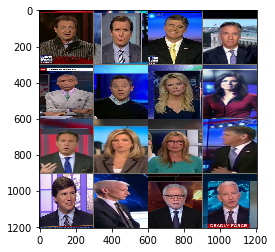

In [84]:
test.visualize_single_batch()

In [90]:
def get_num_parameters(model):
    total_num=0
    if type(model) == type(dict()):
        for key in model:
            for p in model[key].parameters():
                total_num+=p.nelement()
    else:
        for p in model.parameters():
            total_num+=p.nelement()
    return total_num

test.create_model()
print(test.model)
print('num params: ' + str(get_num_parameters(test.model)))

OrderedDict([('inception.Conv2d_1a_3x3.conv.weight', 
(0 ,0 ,.,.) = 
 -0.2103 -0.3441 -0.0344
 -0.1420 -0.2520 -0.0280
  0.0736  0.0183  0.0381

(0 ,1 ,.,.) = 
  0.1417  0.1593  0.0506
  0.0828  0.0854  0.0186
  0.0283  0.0144  0.0508

(0 ,2 ,.,.) = 
  0.0999  0.2301 -0.0327
  0.0720  0.1662 -0.0117
 -0.1027 -0.0244 -0.0876

(1 ,0 ,.,.) = 
 -0.0191  0.0159 -0.0095
  0.0106  0.0659  0.0077
 -0.0133 -0.0063 -0.0381

(1 ,1 ,.,.) = 
 -0.0023 -0.0142 -0.0067
  0.0053  0.0194  0.0047
 -0.0019 -0.0070 -0.0020

(1 ,2 ,.,.) = 
 -0.0013  0.0362  0.0158
  0.0234  0.0887  0.0457
  0.0163  0.0420  0.0303

(2 ,0 ,.,.) = 
 -0.0014 -0.0364  0.0411
 -0.0901 -0.2335 -0.1015
  0.0325 -0.1286 -0.0306

(2 ,1 ,.,.) = 
 -0.0030  0.0574  0.0305
  0.0515  0.1900  0.0995
  0.0021  0.0277  0.0312

(2 ,2 ,.,.) = 
 -0.0714  0.0446 -0.0808
  0.0472  0.2770  0.1226
 -0.0640  0.0745  0.0296

(3 ,0 ,.,.) = 
 -0.0452 -0.1816  0.0073
 -0.1010 -0.2148 -0.0227
 -0.0947 -0.2234 -0.1538

(3 ,1 ,.,.) = 
  0.0336 -0.0577  0.0

In [91]:
test.create_loss_function()

In [92]:
test.create_optimizer()

In [93]:
kwargs = {}
kwargs["visualize_every_n_batches"] = 1
kwargs["save_every_n_batches"] = 2
test.train_model(num_iters=5, **kwargs)

KeyboardInterrupt: 

In [ ]:
# load best model from saved checkpoint
checkpoint_name = './trained_models/180220_1519208350_2600.tar'
log=torch.load(checkpoint_name)
model=log['best_model']
test.log = log
test.model = model

In [ ]:
# plot the losses and accuracies
plt.figure()
matplotlib.rcParams['font.size'] = 14
for key in test.log:
    if 'val_mean_class_acc' == key and test.log[key] is not None:
        y = [np.sum(x) for x in test.log[key]]
        x = np.arange(0, 2601, 200)
        plt.plot(x, y, label=key)
        plt.legend()
        plt.ylabel('Summed MCA')
        plt.xlabel('Iterations')
        plt.show()

In [ ]:
running_loss, running_correct, test_mean_class_acc = test.test_model()

In [ ]:
print('Test Loss: ' + str(running_loss))
print('Test Accuracy: ' + str(running_correct))
print('Test MCA: ' + str(test_mean_class_acc))